In [1]:
# Load libraries.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import time

import datetime as dt
import re

import pandas_datareader.data as web
from pandas_datareader import data as pdr

import yfinance as yf

yf.pdr_override()

import warnings
warnings.filterwarnings("ignore")

# Setting baseline seed
np.random.seed(231017)

# Set print options.

np.set_printoptions(precision = 3)

plt.style.use("ggplot") # Grammar of Graphics Theme

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

In [2]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.decomposition import TruncatedSVD

from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE

In [3]:
from sklearn.preprocessing import StandardScaler

from pandas.plotting import scatter_matrix

In [4]:
dow =\
(
    pd
    .read_csv("https://talktoroh.squarespace.com/s/dow_pca-hemx.csv",
              index_col = 0)
)

In [5]:
dow.head(3)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.52222,NaN,...,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,NaN,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.89986,NaN,...,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,NaN,45.566248,20.907354
2000-01-05,30.122175,33.959430,3.280149,28.473758,14.914205,22.049145,40.895453,17.228147,25.78155,NaN,...,4.702157,16.415912,31.325831,20.085579,20.254784,5.753327,22.564221,NaN,44.503437,21.097421


<Axes: title={'center': 'A Heatmap for Correlation Matrix'}>

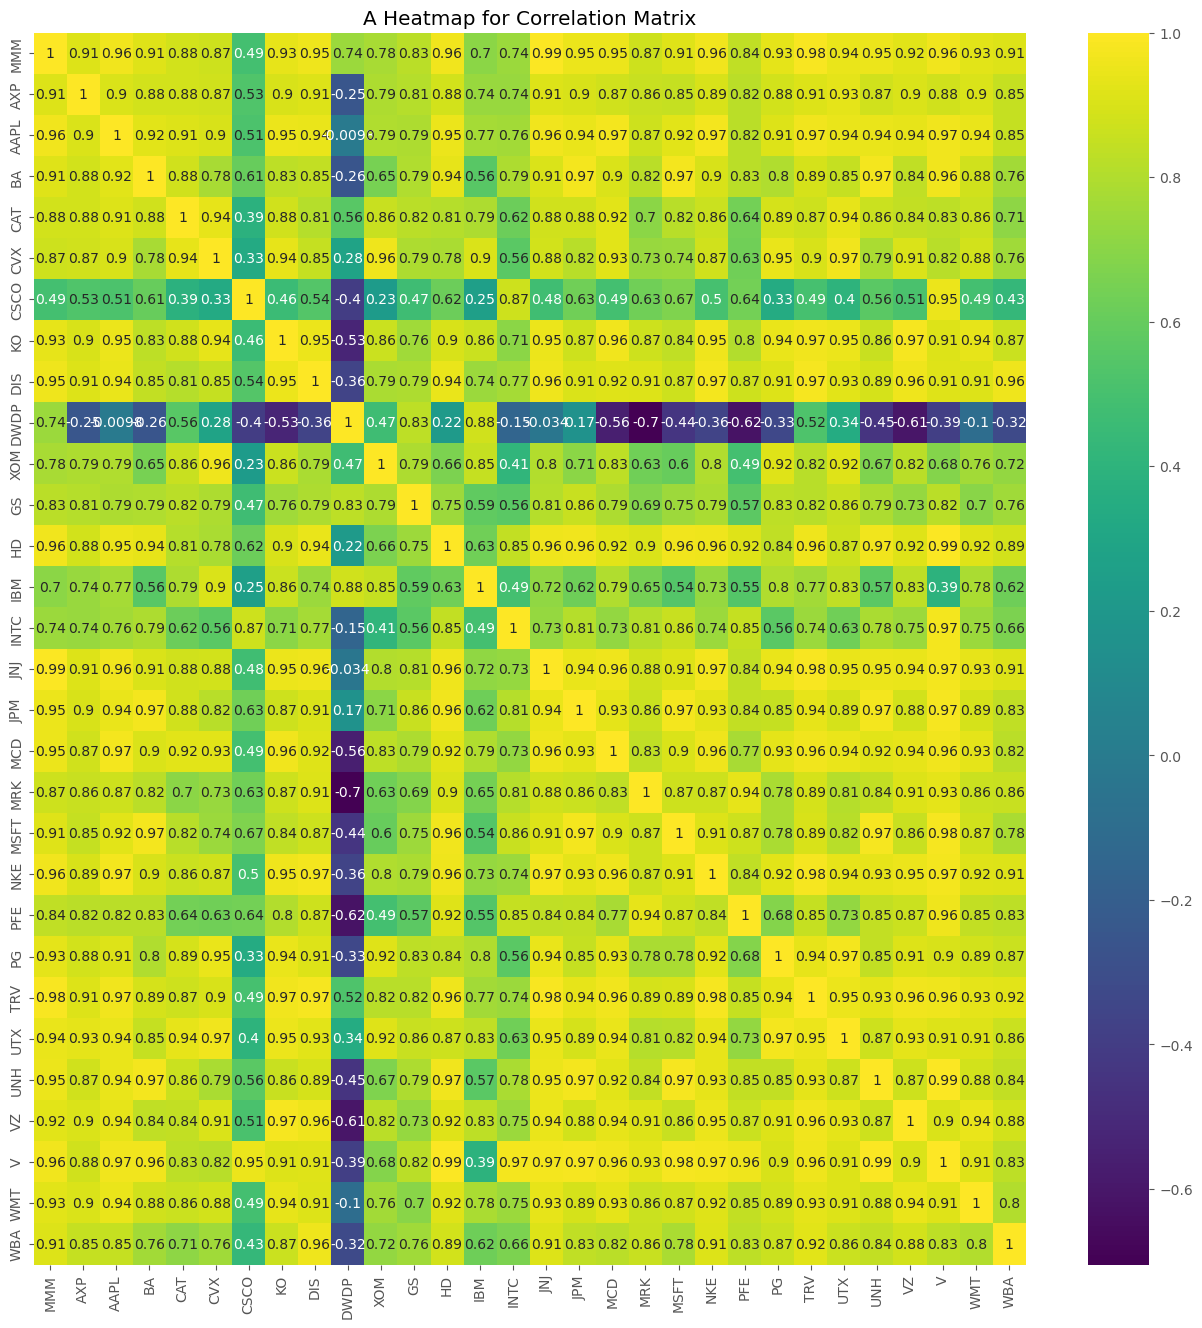

In [6]:
corr = dow.corr()

plt.figure(figsize = [16, 16]
          )

plt.title("A Heatmap for Correlation Matrix")

sns \
    .heatmap(corr,
             annot = True,
             cmap = "viridis")

In [7]:
missing_values = dow.isnull().mean().sort_values(ascending=False)
missing_values.head(5)

DWDP    0.925208
V       0.429792
MMM     0.000000
JPM     0.000000
WMT     0.000000
dtype: float64

In [8]:
drop_list = list(missing_values[missing_values > 0.3].index)
dow = dow.drop(labels=drop_list, axis=1)
dow.shape[1]

28

In [9]:
dow.ffill(inplace=True)
dow.dropna(axis = 0)
dow.shape

(4800, 28)

In [10]:
Daily_Linear_Return = dow.pct_change(1)

In [11]:
Daily_Linear_Return

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.039733,-0.037838,-0.084331,-0.001493,-0.012955,0.000000,-0.056429,0.003378,0.058568,-0.019155,...,-0.033802,-0.054447,-0.037327,-0.019590,-0.013333,-0.040960,-0.012837,-0.032366,-0.037420,-0.037115
2000-01-05,0.050976,-0.005122,0.014634,0.070022,0.037708,0.021643,0.007843,0.010985,0.035409,0.049733,...,0.010567,0.057802,0.018247,-0.008563,0.009828,-0.009343,-0.002262,0.033448,-0.023325,0.009091
2000-01-06,0.058268,0.000000,-0.086538,0.002795,0.036539,0.038741,-0.027237,-0.001052,-0.034198,0.056555,...,-0.033477,-0.005194,0.033920,0.035509,0.001825,0.036713,0.036645,-0.005088,0.014011,-0.027027
2000-01-07,0.019841,0.013972,0.047368,0.029029,0.032539,0.017577,0.059000,0.065789,-0.015808,-0.002935,...,0.013091,0.000000,0.067781,0.079703,0.039769,0.039636,0.117165,-0.007426,0.075522,0.025556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-25,0.017557,0.010529,0.033137,0.016552,0.031116,-0.002555,0.011401,-0.006710,0.004885,0.004482,...,0.009134,0.002113,-0.007570,-0.007423,0.004824,0.002163,0.007215,-0.011740,-0.014437,0.007992
2019-01-28,-0.013783,-0.003870,-0.009255,-0.003377,-0.091261,-0.009274,-0.008238,-0.004222,-0.002520,-0.006693,...,-0.019502,-0.003598,-0.027313,-0.000855,0.000400,-0.006303,-0.004775,-0.023582,0.001238,-0.004312
2019-01-29,0.019410,0.005778,-0.010365,0.005345,0.017368,-0.003031,0.004590,0.004876,0.000812,0.003790,...,-0.020365,-0.001245,0.031369,0.000214,-0.001680,0.023983,0.002137,-0.032504,-0.003606,-0.001118


In [12]:
Daily_Linear_Return.apply(lambda x: (x - x.mean()).abs() < (3*x.std())).all(1)

Date
2000-01-03    False
2000-01-04    False
2000-01-05    False
2000-01-06    False
2000-01-07    False
              ...  
2019-01-25     True
2019-01-28    False
2019-01-29     True
2019-01-30    False
2019-01-31     True
Length: 4800, dtype: bool

In [13]:
Daily_Linear_Return = (
    Daily_Linear_Return[
        Daily_Linear_Return.apply(
            lambda x: 
            (x - x.mean()).abs() < (3*x.std())
        )
        .all(1)
    ]
)

In [14]:
dow.shape[0]-Daily_Linear_Return.shape[0]

912

In [15]:
scaler = StandardScaler().fit(Daily_Linear_Return)
scaler

StandardScaler()

In [16]:
scaled_dow = (
    pd.DataFrame(scaler.fit_transform(Daily_Linear_Return),
                 columns = Daily_Linear_Return.columns, 
                 index = Daily_Linear_Return.index)
)

In [17]:
scaled_dow.describe()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
count,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,...,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03
mean,-1.096517e-17,4.660195e-17,-1.178755e-16,6.122218e-17,7.401487e-17,-5.117077e-17,3.015421e-17,-1.233581e-17,4.386066e-17,-2.832668e-17,...,5.299830e-17,-9.503144e-17,2.924044e-17,-7.401487e-17,1.827528e-17,2.649915e-17,-1.279269e-16,4.386066e-17,1.827528e-18,4.020561e-17
std,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,...,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00
min,-3.922680e+00,-4.354756e+00,-3.724824e+00,-3.699053e+00,-3.687384e+00,-3.796937e+00,-4.357221e+00,-4.011341e+00,-4.052353e+00,-3.824479e+00,...,-4.229289e+00,-3.937974e+00,-3.898983e+00,-4.094951e+00,-4.300197e+00,-3.812740e+00,-3.963000e+00,-3.992325e+00,-3.998857e+00,-3.805467e+00
25%,-5.508673e-01,-4.932035e-01,-5.308158e-01,-5.972063e-01,-5.672663e-01,-5.926707e-01,-4.945972e-01,-5.585051e-01,-5.457730e-01,-5.930095e-01,...,-5.593274e-01,-5.735131e-01,-5.636374e-01,-5.578035e-01,-5.454868e-01,-5.681795e-01,-5.628937e-01,-5.844426e-01,-5.612429e-01,-5.998348e-01
50%,1.004186e-03,-8.222333e-03,-2.275294e-02,-1.030006e-02,-1.653397e-02,1.706494e-02,2.517189e-03,1.007874e-02,1.815486e-03,-1.302072e-02,...,-2.607098e-02,-1.459050e-02,-2.509767e-02,-1.441778e-02,-5.004709e-04,-1.002697e-02,-1.724701e-02,1.182292e-02,-4.940312e-04,-1.994830e-02
75%,5.881598e-01,5.270321e-01,5.396618e-01,6.073168e-01,5.789699e-01,6.066429e-01,5.414868e-01,5.576045e-01,5.583852e-01,5.958424e-01,...,5.521367e-01,5.538539e-01,5.645856e-01,5.445446e-01,5.458177e-01,5.621201e-01,5.617994e-01,5.782902e-01,5.567668e-01,5.885685e-01
max,3.947963e+00,4.322067e+00,3.923732e+00,3.805431e+00,3.806188e+00,3.716547e+00,4.317517e+00,4.043916e+00,4.041645e+00,3.725121e+00,...,4.128677e+00,4.055188e+00,3.868939e+00,4.171749e+00,4.315234e+00,3.981293e+00,4.001403e+00,3.751665e+00,4.100298e+00,3.754610e+00


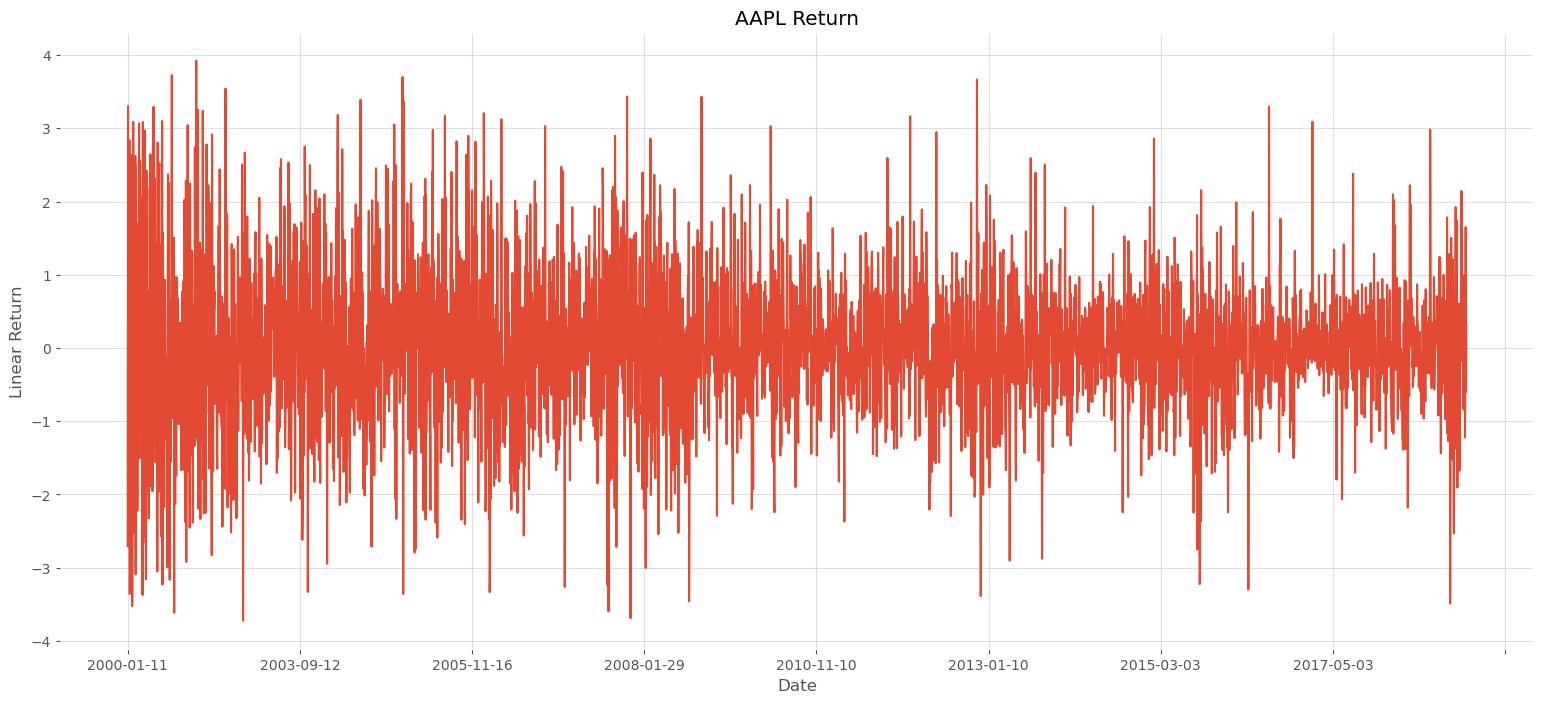

In [18]:
plt.figure(figsize=[19, 8])
plt.title("AAPL Return")
plt.ylabel("Linear Return")
scaled_dow["AAPL"].plot()
plt.show()

In [19]:
prop = int(len(scaled_dow)*0.8)

X_Train = scaled_dow[:prop]
X_Test = scaled_dow[prop:]

X_Train_Raw = Daily_Linear_Return[:prop]
X_Test_Raw = Daily_Linear_Return[prop:]

In [20]:
stock_tickers = scaled_dow.columns.values
stock_tickers

array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
       'WBA'], dtype=object)

In [21]:
pca = PCA()
PrincipalComponent = pca.fit(X_Train)
PrincipalComponent

PCA()

In [22]:
pca.components_[0]

array([-0.228, -0.228, -0.153, -0.19 , -0.202, -0.178, -0.195, -0.168,
       -0.208, -0.193, -0.209, -0.202, -0.199, -0.195, -0.167, -0.228,
       -0.152, -0.17 , -0.194, -0.171, -0.19 , -0.168, -0.198, -0.227,
       -0.138, -0.167, -0.169, -0.161])

In [23]:
NumEigenValues = 10

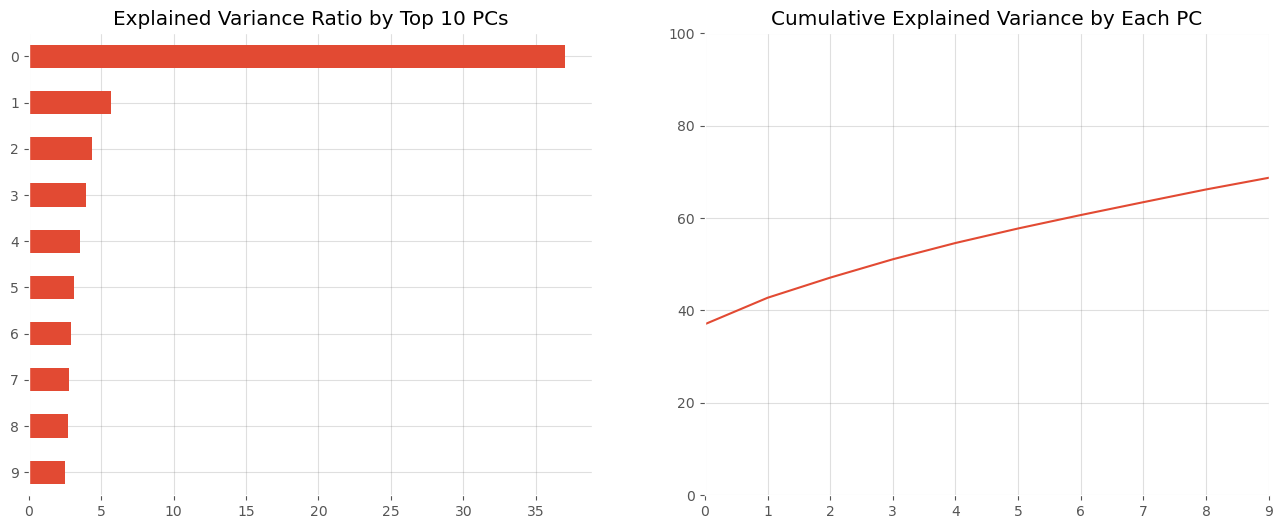

In [24]:
fig, axes = plt.subplots(ncols = 2, figsize = [16,6])

Series1 = (
    pd.Series(
        pca
        .explained_variance_ratio_[:NumEigenValues]
    )
    .sort_values()
    *
    100
)

Series2 = pd.Series(pca.explained_variance_ratio_[:NumEigenValues]).cumsum()*100

Series1.plot.barh(title = "Explained Variance Ratio by Top 10 PCs", ax = axes[0])

Series2.plot(ylim = (0,100),xlim=(0,9),title = "Cumulative Explained Variance by Each PC", ax=axes[1])

plt.show()

In [25]:
(
    pd.Series(
        np.cumsum(pca.explained_variance_ratio_)
    )
    .to_frame("Explained Variance")
    .head(NumEigenValues)
    .style.format("{:,.2%}".format)
)

,Explained Variance
0,37.04%
1,42.75%
2,47.11%
3,51.08%
4,54.61%
5,57.75%
6,60.65%
7,63.44%
8,66.19%
9,68.71%


In [26]:
def PCWeights():
    
    weights = pd.DataFrame()
    
    for i in range(len(pca.components_)):
        weights["weight_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])
    
    weights = weights.values.T
    return weights

In [27]:
NumComponents = 5

topPortfolios = pd.DataFrame(pca.components_[:NumComponents], columns = dow.columns)

eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis = 0)

eigen_portfolios.index = [f"Portfolio {i}" for i in range(NumComponents)]

np.sqrt(pca.explained_variance_)

array([3.319, 1.304, 1.138, 1.087, 1.023, 0.967, 0.93 , 0.911, 0.904,
       0.866, 0.854, 0.843, 0.816, 0.793, 0.777, 0.775, 0.758, 0.754,
       0.733, 0.726, 0.706, 0.682, 0.674, 0.656, 0.648, 0.607, 0.567,
       0.448])

In [28]:
eigen_portfolios.iloc[0]

MMM     0.043399
AXP     0.043523
AAPL    0.029155
BA      0.036177
CAT     0.038487
CVX     0.033941
CSCO    0.037154
KO      0.032085
DIS     0.039660
XOM     0.036810
GS      0.039793
HD      0.038581
IBM     0.037977
INTC    0.037205
JNJ     0.031800
JPM     0.043456
MCD     0.028888
MRK     0.032408
MSFT    0.036928
NKE     0.032630
PFE     0.036196
PG      0.032003
TRV     0.037657
UTX     0.043170
UNH     0.026311
VZ      0.031815
WMT     0.032181
WBA     0.030611
Name: Portfolio 0, dtype: float64

In [29]:
NumComponents

5

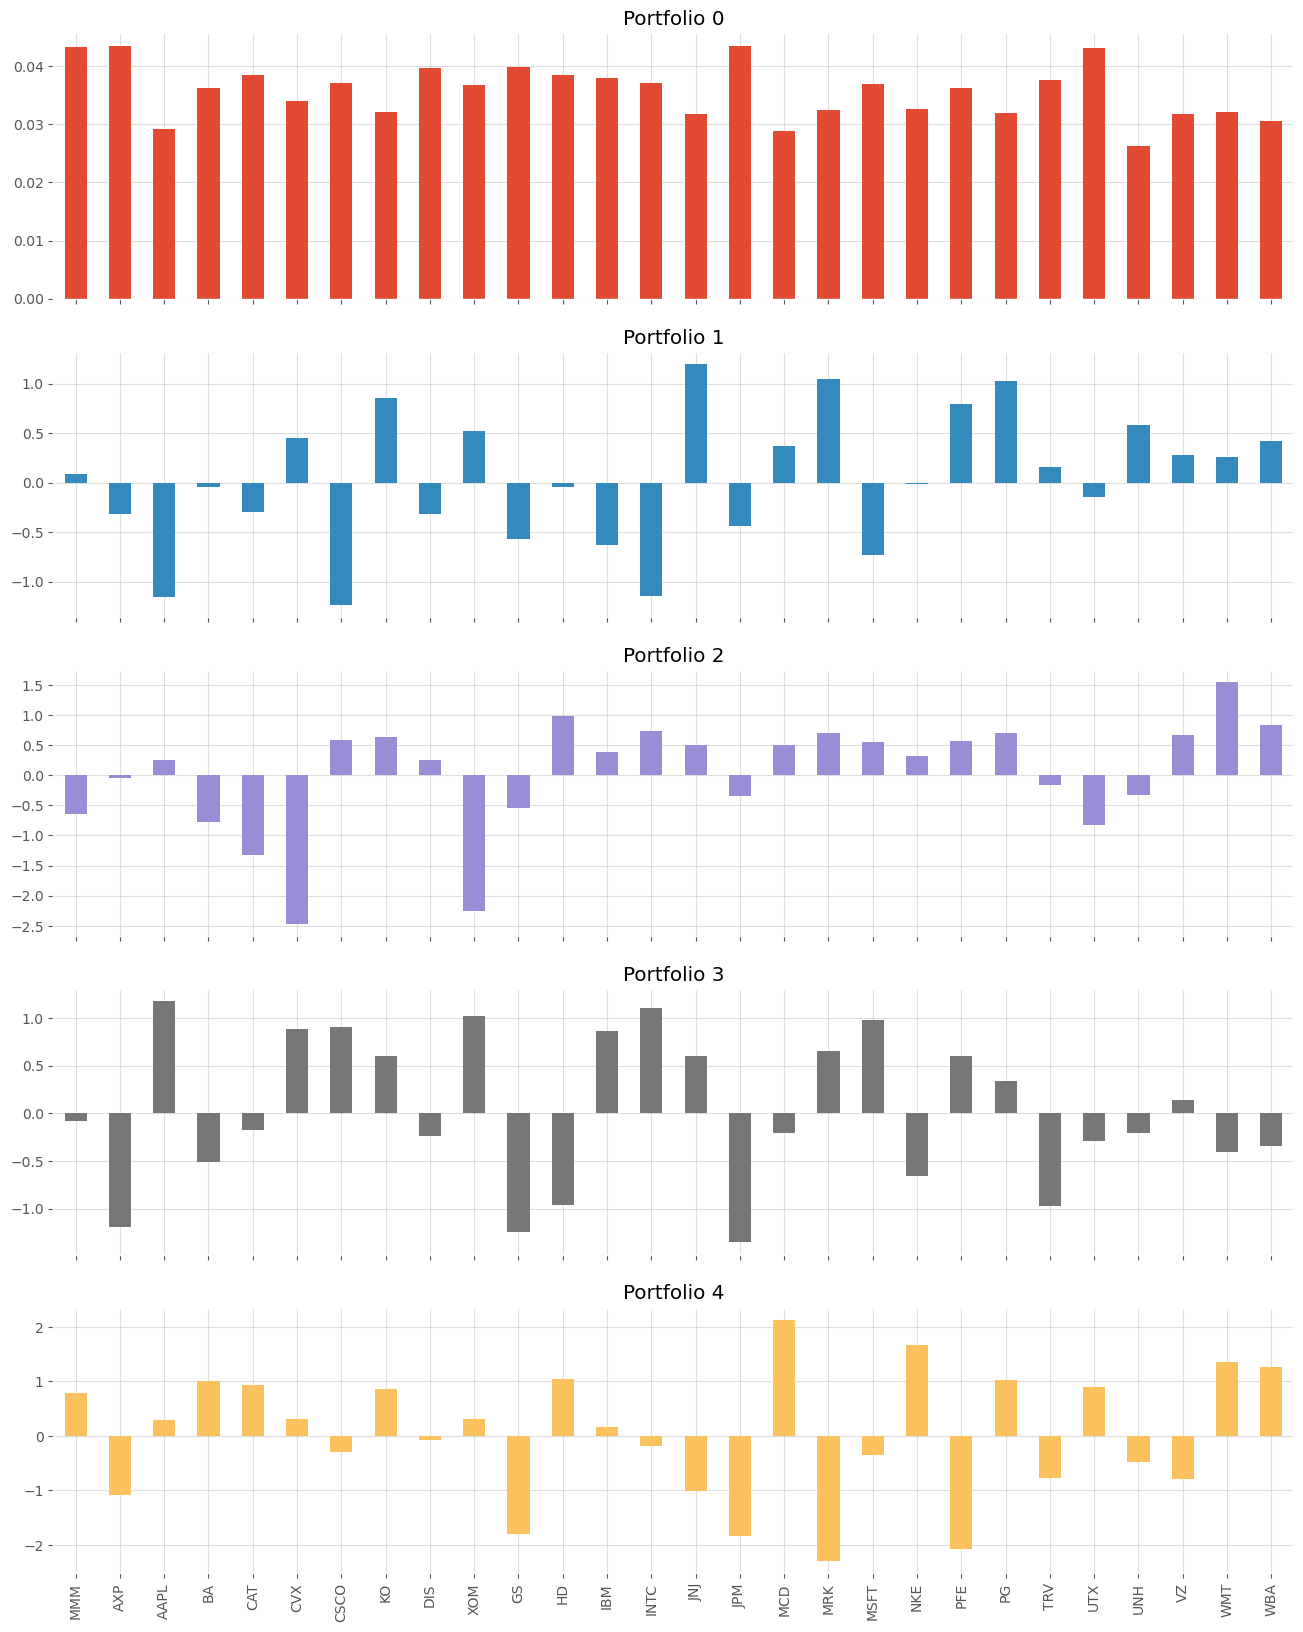

In [39]:
(
    eigen_portfolios.T
    .plot.bar(
        subplots = True,
        layout = (NumComponents,1),
        legend = False,
        #sharey = True,
        figsize = [16, 20],
        #ylim=[1,1]
    )
)

plt.show()

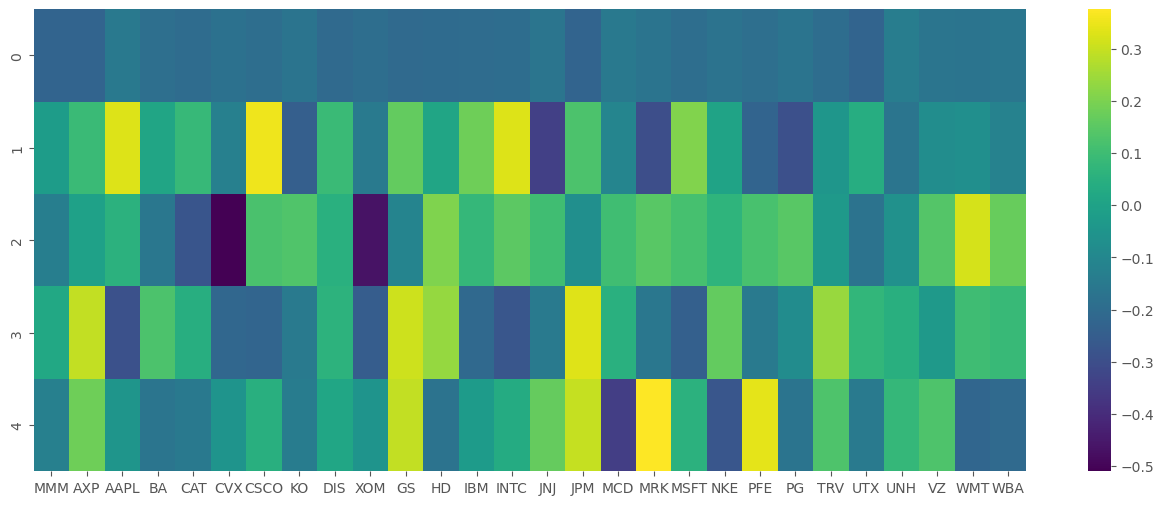

In [43]:
plt.figure(figsize = [16,6])
sns.heatmap(topPortfolios, cmap = "viridis")
plt.show()

In [90]:
def calculate_sharpe_ratio(ts_returns, periods_per_year = 252):
    n_years = ts_returns.shape[0] / periods_per_year

    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                ) - 1

    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)

    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

In [95]:
def recommend_optimal_portfolio():
    n_portfolios = len(pca.components_)

    annualized_ret = np.array([0.]*n_portfolios)
    sharpe_metric = np.array([0.]*n_portfolios)
    annualized_vol = np.array([0.]*n_portfolios)

    highest_sharpe = 0

    stock_tickers = scaled_dow.columns.values

    n_tickers = len(stock_tickers)

    PCs = pca.components_

    for i in range(n_portfolios):
        pc_w = PCs[i]/sum(PCs[i])

        eigen_prtfi = pd.DataFrame({"weights": pc_w.squeeze()*100}, index = stock_tickers)

        eigen_prtfi.sort_values(by=["weights"], ascending = False, inplace = True)

        eigen_prti_returns = np.dot(X_Train_Raw.loc[ : , eigen_prtfi.index],pc_w)

        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(), index = X_Train_Raw.index)

        er, vol, sharpe = calculate_sharpe_ratio(eigen_prti_returns)

        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe

        sharpe_metric = np.nan_to_num(sharpe_metric)

    highest_sharpe = np.argmax(sharpe_metric)

    print("Our Eigen Portfolio #%d with the highest Sharpe \nReturn %.2f%%, \nvol=%.2f%%, \nSharpe = %0.2f" %
         (highest_sharpe,
          annualized_ret[highest_sharpe]*100,
          annualized_vol[highest_sharpe]*100,
          sharpe_metric[highest_sharpe]
         )
         )

    results = pd.DataFrame(data = {
        "Return": annualized_ret,
        "Vol": annualized_vol, 
        "Sharpe": sharpe_metric
    }
                          )

    results.sort_values(by = ["Sharpe"],
                        ascending = False,
                        inplace = True)

    # Print the top 10 eigenportfolios based on Sharpe ratio

    print(results.head(10)
         )

In [96]:
recommend_optimal_portfolio()

Our Eigen Portfolio #0 with the highest Sharpe 
Return 11.56%, 
vol=13.32%, 
Sharpe = 0.87
      Return        Vol    Sharpe
0   0.115609   0.133165  0.868168
1   0.055351   0.671441  0.082436
5   0.036402   0.852033  0.042724
12       NaN   4.625343  0.000000
17       NaN   3.171664  0.000000
25       NaN   5.077114  0.000000
9        NaN   3.291363  0.000000
11       NaN   7.785157  0.000000
18 -1.000000  21.052878 -0.047499
2  -0.105713   0.855441 -0.123578
